# Measuring positions of the vehicle
The code snippets below take CSV files from positional video recordings of the remote control car. In this notebook we will analyze the vehicles positions on different tracks.

In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

def read_x_y(fname):
    f = open(fname, 'r')
    reader = csv.reader(f)
    x = []
    y = []
    for row in reader:
        x.append( float(row[1]) )
        y.append( -float(row[2]) + 300 )
    return x, y

Calculate average x, y positions of the tracks=
* does the mean of the robot path, is it or not different thatn the human path
* Student tea test, demonstrate normality - is it normal
* null hypothesis, assume that the mean robot error

In [35]:
import os
cwd = os.getcwd()
directory = cwd+'/csvs/circuitcsv/'
rnn,rnncat, linear, cat, human = [],[],[],[],[]
for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".py"): 
        #print(os.path.join(directory, filename))
        fdir = os.path.join(directory, filename)
        if 'rnncat' in  filename:
            #rnncat.append(read_x_y(str(fdir)))
            continue
        if 'cat' in filename:
            #cat.append(read_x_y(str(fdir)))
            continue
        if 'linear' in filename:
            #linear.append(read_x_y(str(fdir)))
            continue
        if 'rnn' in filename:
            rnn.append(read_x_y(str(fdir)))
            continue
        if 'human' in filename:
            human.append(read_x_y(str(fdir)))
            continue
        continue
    else:
        continue


rnn  size = 5
human  size = 3


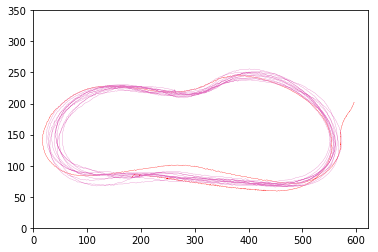

In [37]:
datasets = {'rnn':[rnn,'r'],'rnncat':[rnncat,'g'], 'linear':[linear,'b'], 'cat':[cat,'c'], 'human':[human,'tab:pink']}
for data in datasets:
    pos = datasets[data][0]
    #print(len(pos[1][0]))
    if(len(pos) != 0) :
        print(data + "  size = "+str(len(pos)))
        #for i in range(len(pos)):
        for i in range(2):
            plt.plot(pos[i][0],pos[i][1],c=datasets[data][1],linewidth=0.3)
        
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.show()

In [7]:
import plotly
plotly.tools.set_credentials_file(username='j.zisheng', api_key='AHUUF04GLPPXSDg2RYM3')


import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

x = np.linspace(0, 2*np.pi, 100)
f = np.sin(x)
g = np.cos(x)
h = [(f[j] + g[j])/2 for j in range(len(x))] 

trace1 = go.Scatter(
    x=pos[0][0],
    y=pos[0][1],
    mode='lines',
    name='f(x)',
    marker=dict(
        color='rgb(220, 20, 60)'
    )
)

trace2 = go.Scatter(
    x=pos[1][0],
    y=pos[1][1],
    mode='lines',
    name='g(x)',
    marker=dict(
        color='rgb(100, 149, 237)'
    )
)

trace3 = go.Scatter(
    x=x,
    y=h,
    mode='markers+lines',
    name='Average of f and g',
    marker=dict(
        color='rgb(128, 0, 128)',
        symbol='diamond-open',
    )
)

data = [trace1, trace2, trace3]
py.iplot(data, filename='2-curves')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~j.zisheng/0 or inside your plot.ly account where it is named '2-curves'
